# Customer Churn Analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest 
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

IMPORTING DATAFRAME

In [2]:
df=pd.read_csv('C:/Users/user/Desktop/DT Python/drscience master thing/DSData-master/DSData-master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.iterrows

<bound method DataFrame.iterrows of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df.TotalCharges=pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [9]:
df.dropna(inplace=True)
data=df.iloc[: , 1 :]
data['Churn'].replace(to_replace='Yes' , value=1, inplace=True)
data['Churn'].replace(to_replace='No', value=0, inplace=True)
df_dummies=pd.get_dummies(data)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [10]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [11]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# EDA

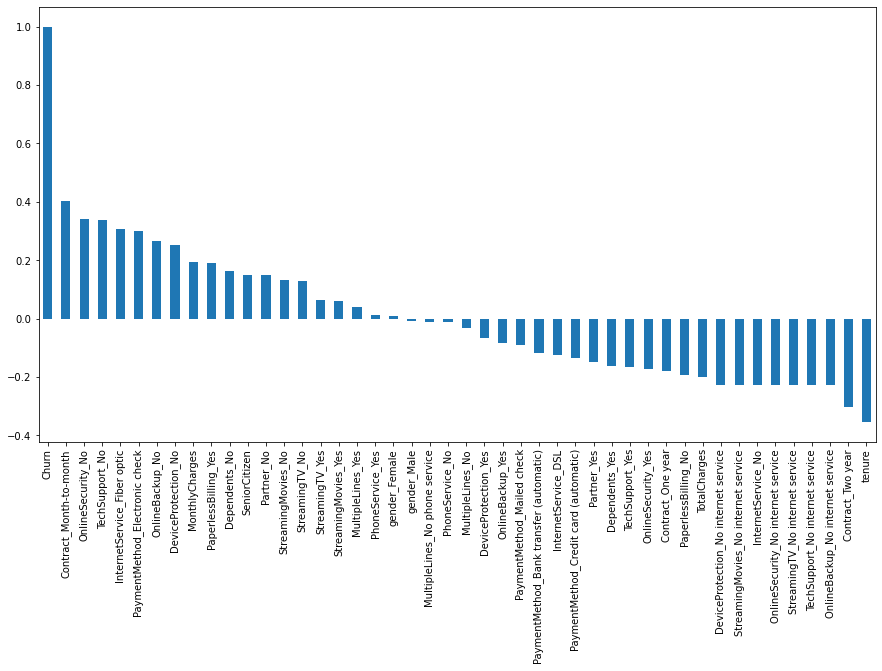

In [13]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar');

In [14]:
df_visualization_nominal=df[['gender' , 'SeniorCitizen' , 'Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'InternetService',
                                 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' ,
                                 'StreamingTV' , 'StreamingMovies' , 'Contract' , 'PaperlessBilling' ,
                                'PaymentMethod' , 'Churn']].copy()

Male      3549
Female    3483
Name: gender, dtype: int64


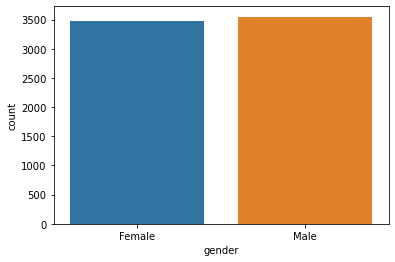

In [15]:
sns.countplot(x="gender",data=df_visualization_nominal)
print(df_visualization_nominal["gender"].value_counts())

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


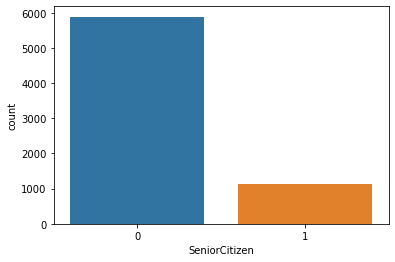

In [16]:
sns.countplot(x="SeniorCitizen",data=df_visualization_nominal)
print(df_visualization_nominal["SeniorCitizen"].value_counts())

No     3639
Yes    3393
Name: Partner, dtype: int64


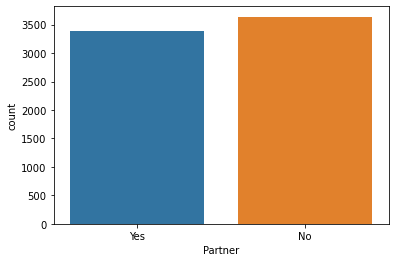

In [17]:
sns.countplot(x="Partner",data=df_visualization_nominal)
print(df_visualization_nominal["Partner"].value_counts())

No     4933
Yes    2099
Name: Dependents, dtype: int64


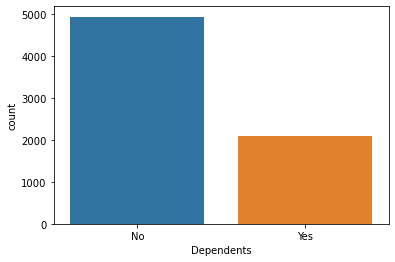

In [18]:
sns.countplot(x="Dependents",data=df_visualization_nominal)
print(df_visualization_nominal["Dependents"].value_counts())

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


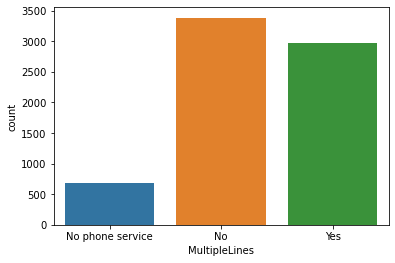

In [19]:
sns.countplot(x="MultipleLines",data=df_visualization_nominal)
print(df_visualization_nominal["MultipleLines"].value_counts())

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


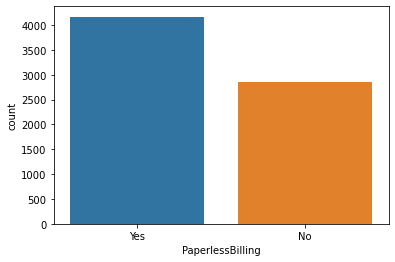

In [20]:
sns.countplot(x="PaperlessBilling",data=df_visualization_nominal)
print(df_visualization_nominal["PaperlessBilling"].value_counts())

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


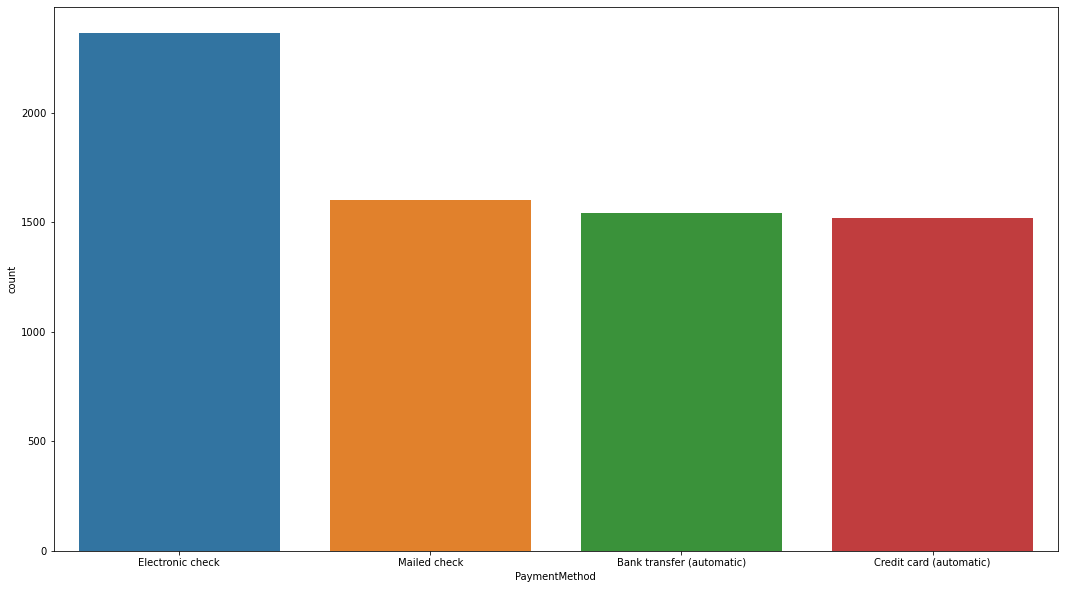

In [21]:
plt.figure(figsize=(18,10))
sns.countplot(x="PaymentMethod",data=df_visualization_nominal)
print(df_visualization_nominal["PaymentMethod"].value_counts())

No     5163
Yes    1869
Name: Churn, dtype: int64


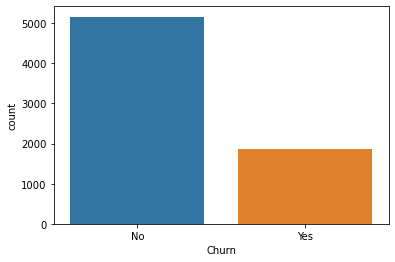

In [22]:
sns.countplot(x="Churn",data=df_visualization_nominal)
print(df_visualization_nominal["Churn"].value_counts())

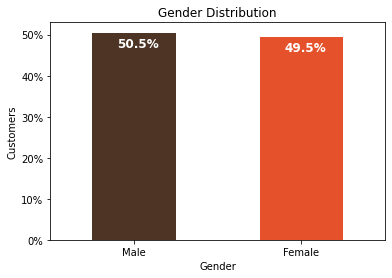

In [23]:
import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0, color = colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

totals = [] # create a list to collect the plt.patches data

for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
      ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', fontsize=12, color='white', weight = 'bold')


Gender distribution Male 50.5% and Female 49.5%

Text(0.5, 1.0, 'Distributions of Senior Citizens')

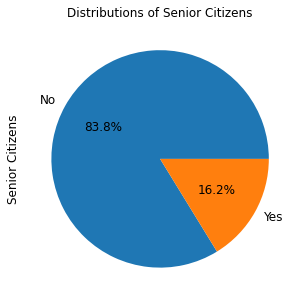

In [24]:
ax=(df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels=['No' , 'Yes'], figsize= (5,5), fontsize=12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('Distributions of Senior Citizens', fontsize=12)

distributions of senior citizens No 83.8%, Yes 16.2%

Text(0.5, 1.0, 'Customers and their Tenure')

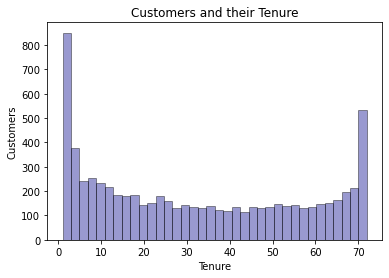

In [25]:
x=sns.distplot(df['tenure'], hist=True, kde=False, bins=int(180/5), color='darkblue',hist_kws={'edgecolor' : 'black' }, kde_kws={'linewidth':4})
x.set_ylabel('Customers')
x.set_xlabel('Tenure')
x.set_title('Customers and their Tenure')

by using distplot, customers and their tenure is getting higher at between 0-10

Text(0.5, 1.0, 'Customers and their Contract Type')

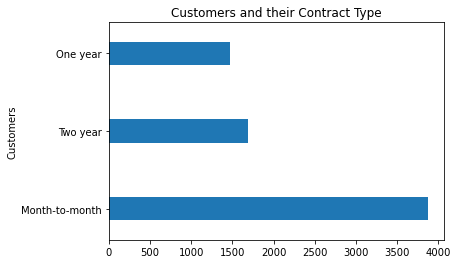

In [26]:
x=df['Contract'].value_counts().plot(kind='barh', rot=0, width=0.3)
x.set_ylabel('Customers')
x.set_title('Customers and their Contract Type')

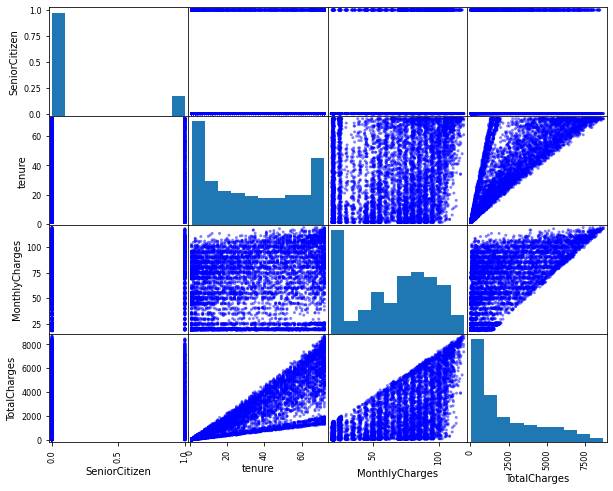

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,8),color='b')
plt.show()

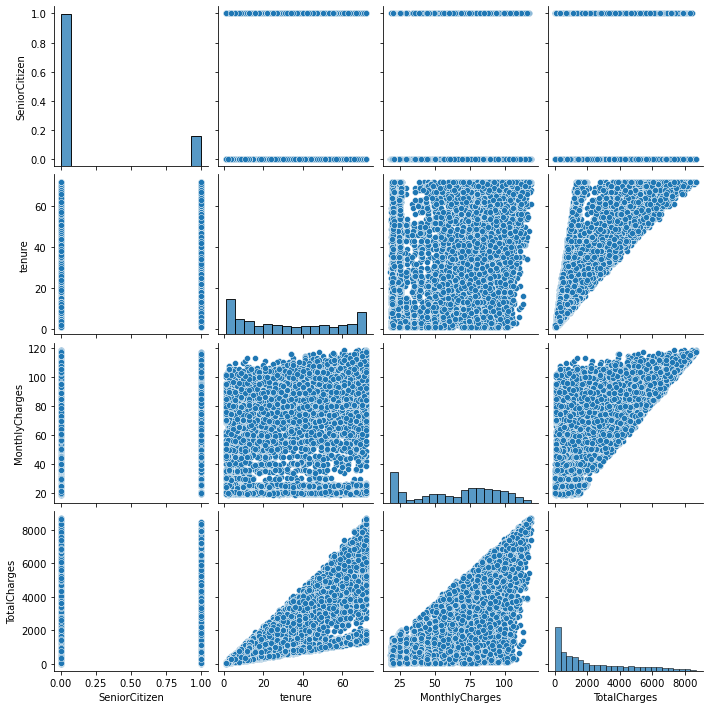

In [28]:
sns.pairplot(data=df)

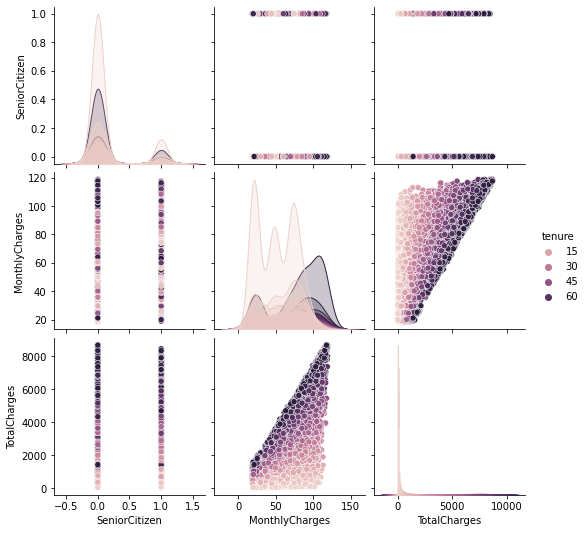

In [29]:
sns.pairplot(data=df, hue="tenure")

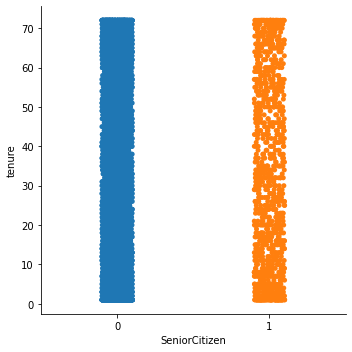

In [30]:
sns.catplot(x="SeniorCitizen", y="tenure", data=df)

In [31]:
df_visualization_continuous=df[["MonthlyCharges","TotalCharges"]].copy()

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

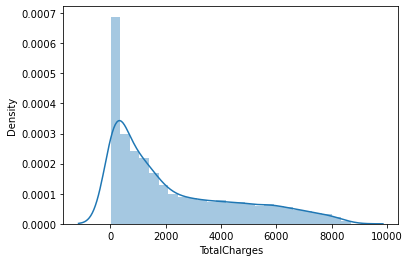

In [32]:
sns.distplot(df_visualization_continuous['TotalCharges'],kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

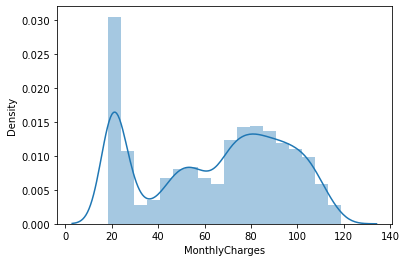

In [33]:
sns.distplot(df_visualization_continuous['MonthlyCharges'],kde=True)

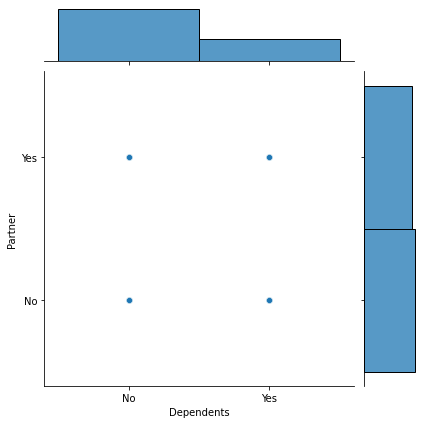

In [34]:
sns.jointplot(x='Dependents',y='Partner',data=df)
plt.xticks(rotation=90)
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


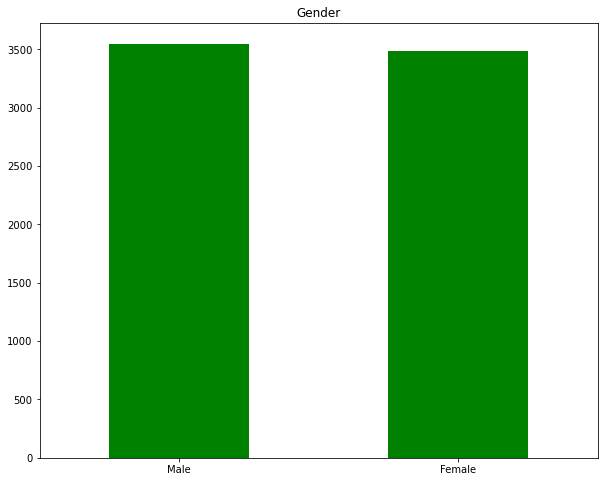

In [36]:
plt.subplot()
df['gender'].value_counts().plot(kind='bar',title='Gender',figsize=(10,8),color='g')
plt.xticks(rotation=0);

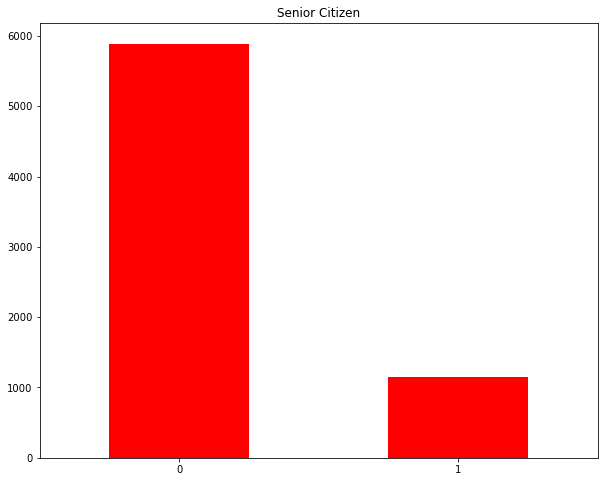

In [37]:
plt.subplot()
df['SeniorCitizen'].value_counts().plot(kind='bar',title='Senior Citizen',figsize=(10,8),color='r')
plt.xticks(rotation=0);

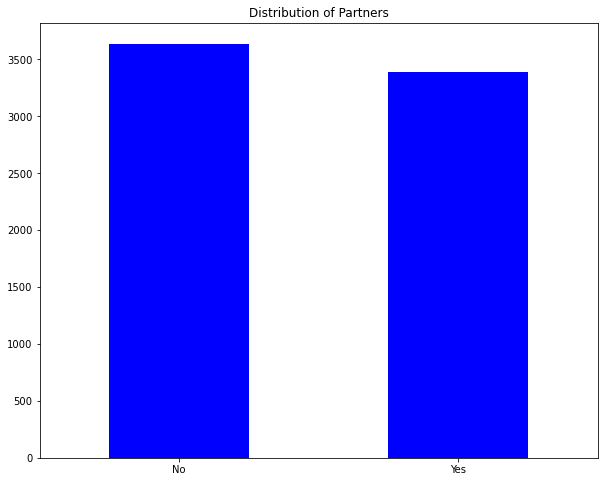

In [38]:
plt.subplot()
df['Partner'].value_counts().plot(kind='bar',title='Distribution of Partners',figsize=(10,8),color='b')
plt.xticks(rotation=0);

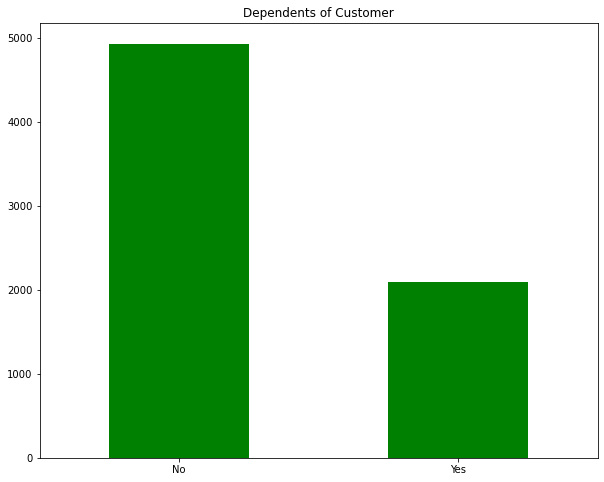

In [39]:
plt.subplot()
df['Dependents'].value_counts().plot(kind='bar',title='Dependents of Customer',figsize=(10,8),color='g')
plt.xticks(rotation=0);

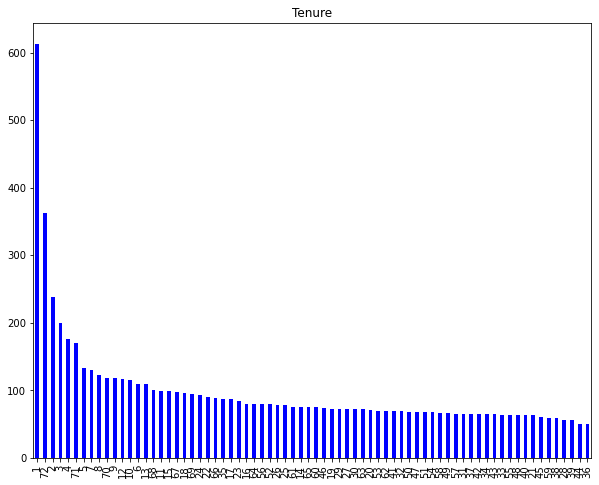

In [40]:
plt.subplot()
df['tenure'].value_counts().plot(kind='bar',title='Tenure',figsize=(10,8),color='b')
plt.xticks(rotation=90);

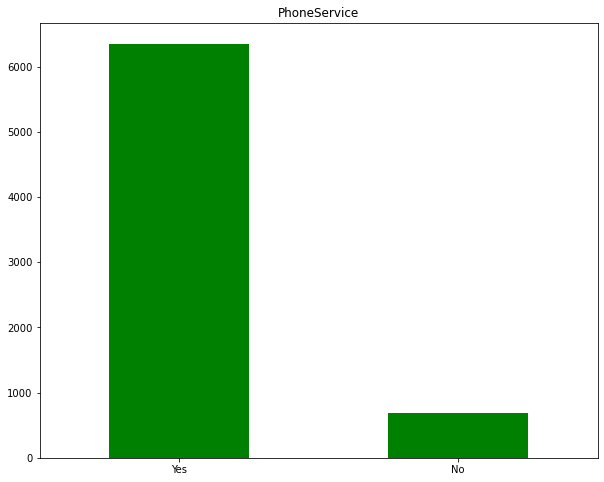

In [41]:
plt.subplot()
df['PhoneService'].value_counts().plot(kind='bar',title='PhoneService',figsize=(10,8),color='g')
plt.xticks(rotation=0);

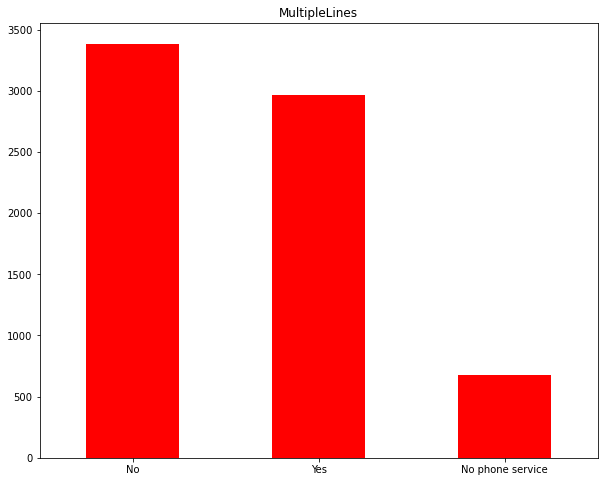

In [42]:
plt.subplot()
df['MultipleLines'].value_counts().plot(kind='bar',title='MultipleLines',figsize=(10,8),color='r')
plt.xticks(rotation=0);

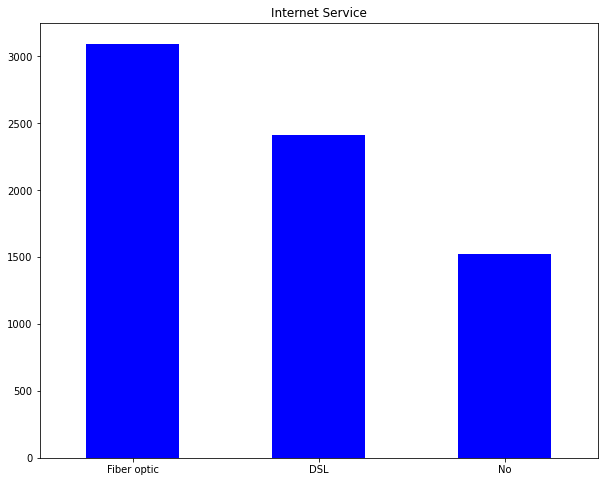

In [43]:
plt.subplot()
df['InternetService'].value_counts().plot(kind='bar',title='Internet Service',figsize=(10,8),color='b')
plt.xticks(rotation=0);

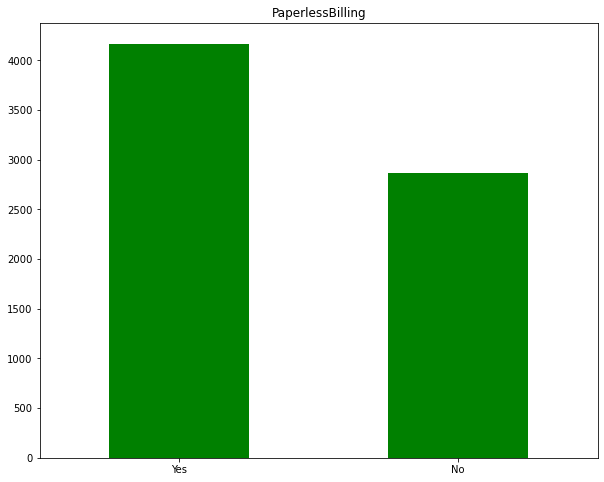

In [44]:
plt.subplot()
df['PaperlessBilling'].value_counts().plot(kind='bar',title='PaperlessBilling',figsize=(10,8),color='g')
plt.xticks(rotation=0);

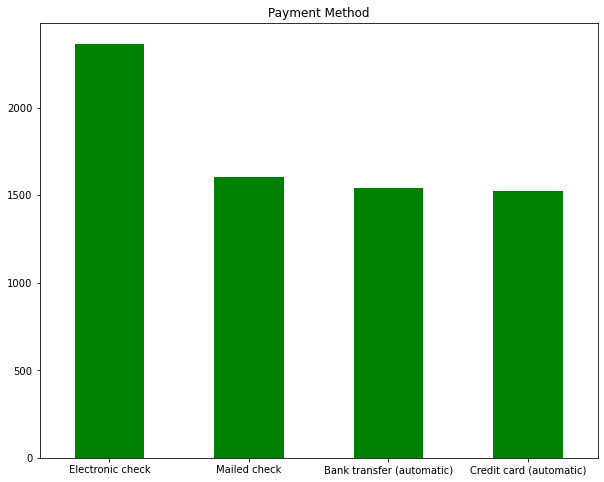

In [45]:
plt.subplot()
df['PaymentMethod'].value_counts().plot(kind='bar',title='Payment Method',figsize=(10,8),color='g')
plt.xticks(rotation=0);

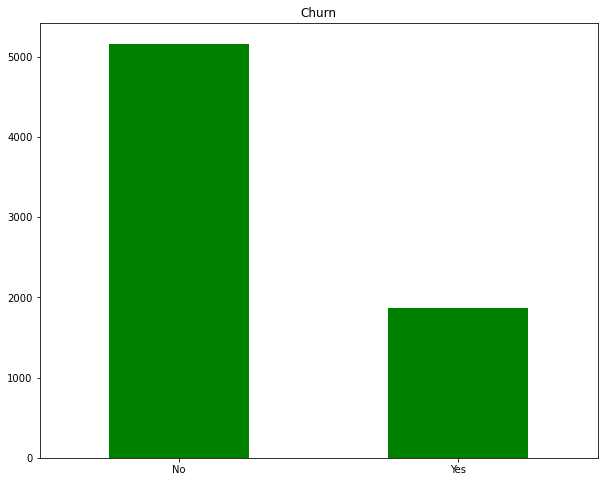

In [46]:
plt.subplot()
df['Churn'].value_counts().plot(kind='bar',title='Churn',figsize=(10,8),color='g')
plt.xticks(rotation=0);

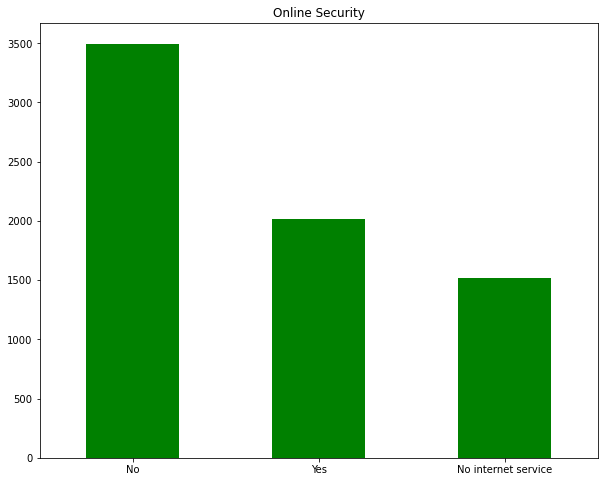

In [47]:
plt.subplot()
df['OnlineSecurity'].value_counts().plot(kind='bar',title='Online Security',figsize=(10,8),color='g')
plt.xticks(rotation=0);

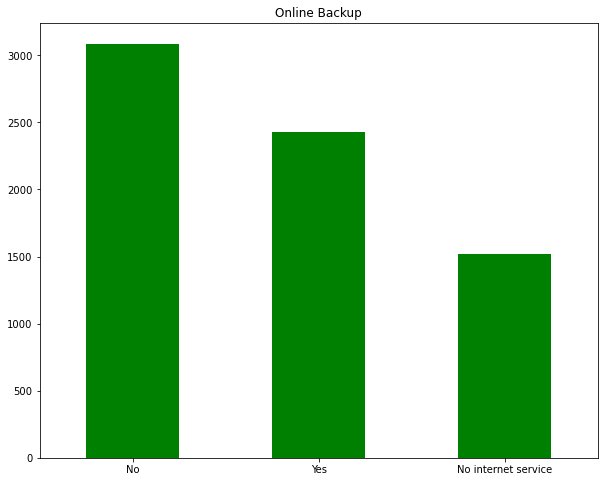

In [48]:
plt.subplot()
df['OnlineBackup'].value_counts().plot(kind='bar',title='Online Backup',figsize=(10,8),color='g')
plt.xticks(rotation=0);

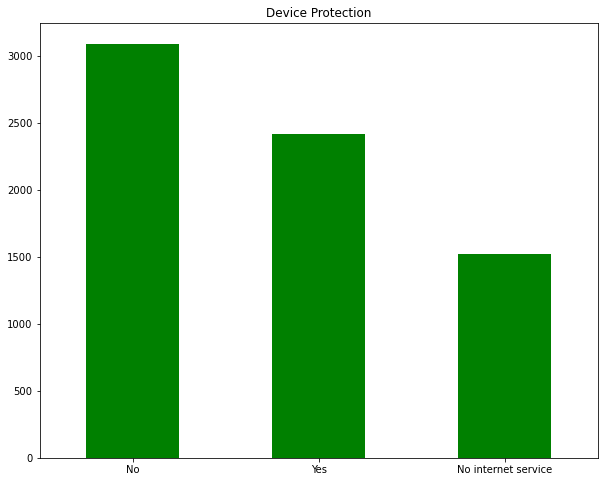

In [49]:
plt.subplot()
df['DeviceProtection'].value_counts().plot(kind='bar',title='Device Protection',figsize=(10,8),color='g')
plt.xticks(rotation=0);

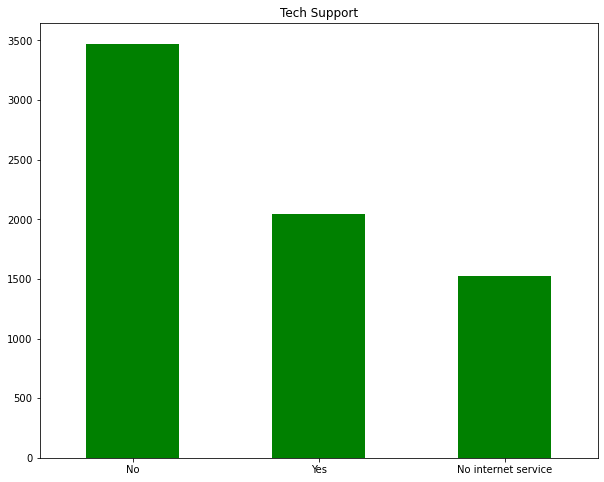

In [50]:
plt.subplot()
df['TechSupport'].value_counts().plot(kind='bar',title='Tech Support',figsize=(10,8),color='g')
plt.xticks(rotation=0);

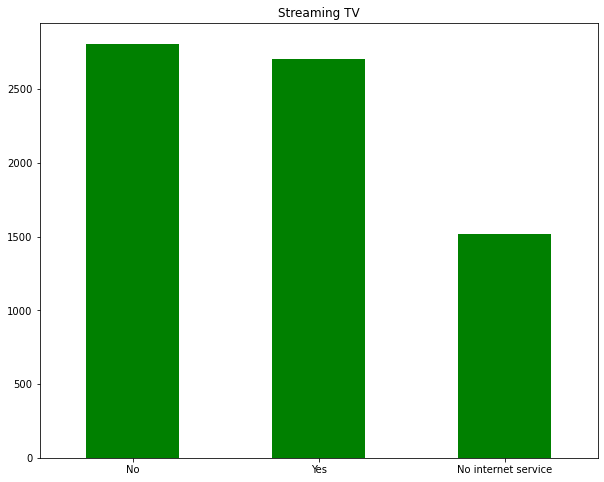

In [51]:
plt.subplot()
df['StreamingTV'].value_counts().plot(kind='bar',title='Streaming TV',figsize=(10,8),color='g')
plt.xticks(rotation=0);

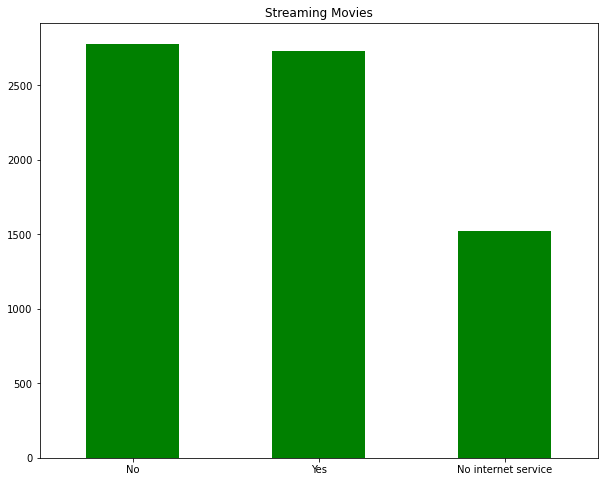

In [52]:
plt.subplot()
df['StreamingMovies'].value_counts().plot(kind='bar',title='Streaming Movies',figsize=(10,8),color='g')
plt.xticks(rotation=0);

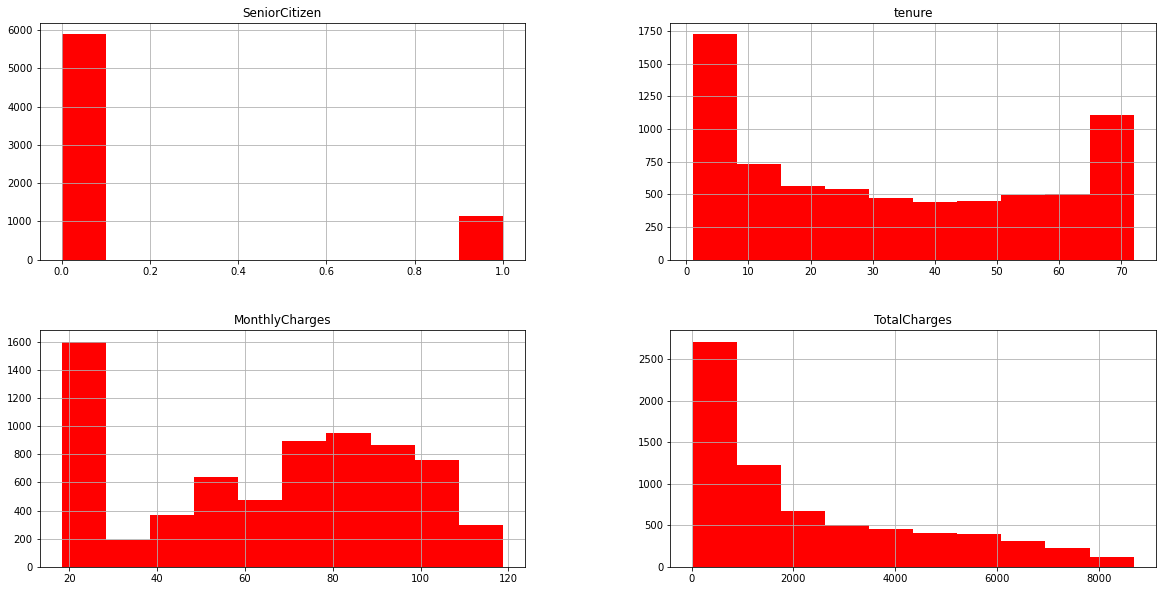

In [53]:
df.hist(color='r',figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

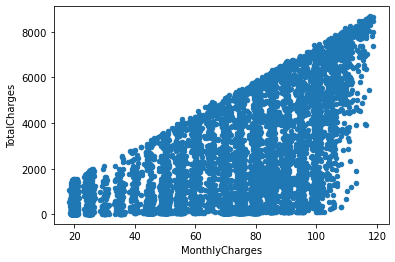

In [54]:
df[['MonthlyCharges','TotalCharges']].plot.scatter(x='MonthlyCharges', y='TotalCharges')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

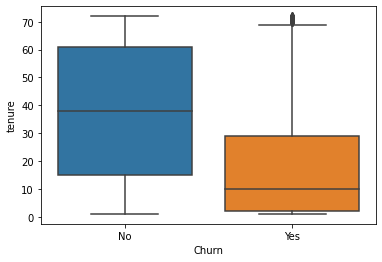

In [55]:
sns.boxplot(x=df.Churn, y=df.tenure)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

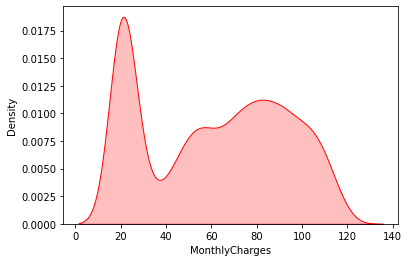

In [56]:
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ], color="Red", shade=True)

sns.kdeplot(df.MonthlyCharges[(df["Churn"] =='Yes')],ax=ax, color="Blue", shade=True)

ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')

ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

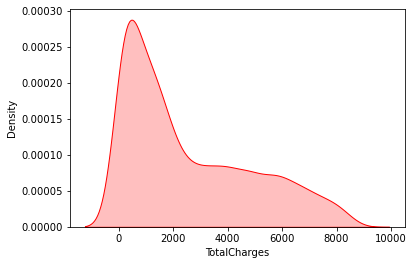

In [57]:
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ], color="Red", shade=True)

sns.kdeplot(df.TotalCharges[(df["Churn"] =='Yes')],ax=ax, color="Blue", shade=True)

ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')

ax.set_title('Distribution of total charges by churn')

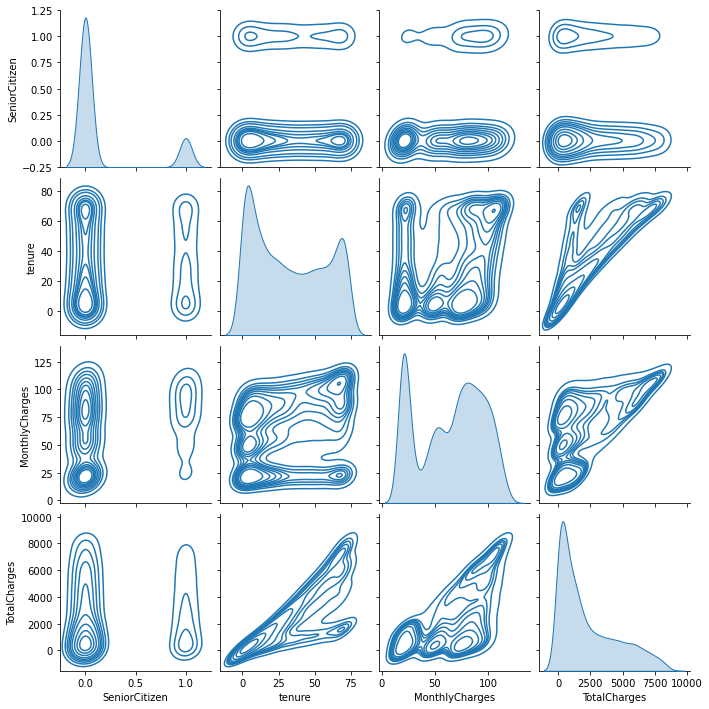

In [58]:
sns.pairplot(df, kind="kde")

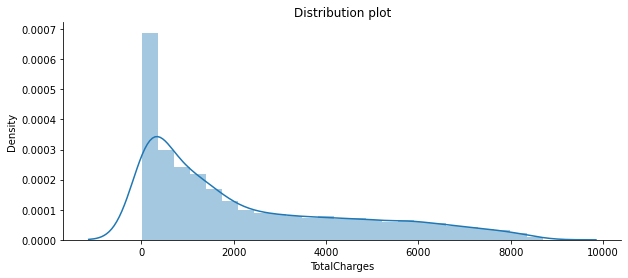

In [59]:
def dist_plots(df):
    plt.figure(figsize=(10,4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(df['TotalCharges'])    

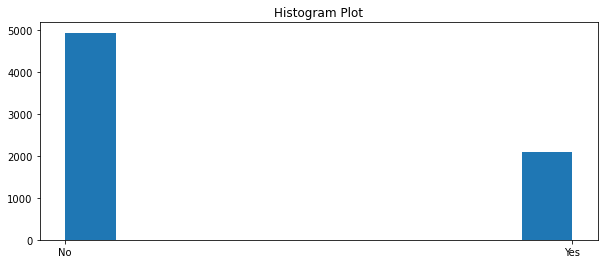

In [60]:
def hist_plots(df):
    plt.figure(figsize=(10,4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(df['Dependents'])

<Figure size 720x288 with 0 Axes>

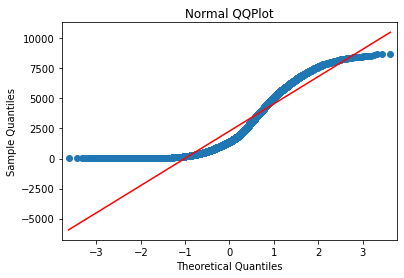

In [61]:
from statsmodels.graphics.gofplots import qqplot
def qq_plots(df):
    plt.figure(figsize=(10,4))
    qqplot(df, line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(df['TotalCharges'])    

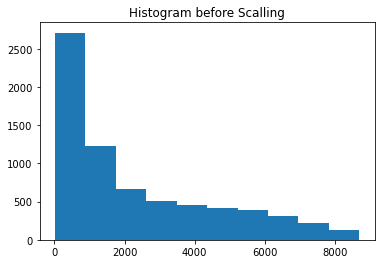

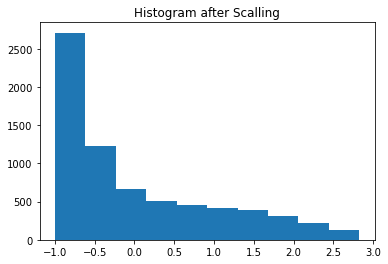

In [62]:
from sklearn import preprocessing
plt.hist(df['TotalCharges'])
plt.title("Histogram before Scalling")
plt.show()
scaler=preprocessing.StandardScaler()
df['TotalCharges']=scaler.fit_transform(df['TotalCharges'].values.reshape(-1,1))
plt.hist(df['TotalCharges'])
plt.title("Histogram after Scalling")
plt.show()

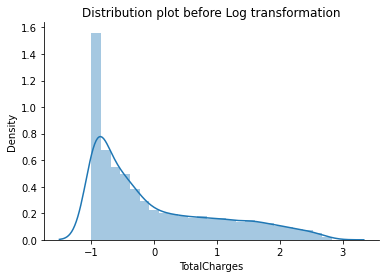

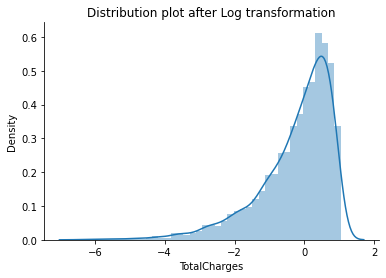

In [63]:
sns.distplot(df['TotalCharges'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
df['TotalCharges']=np.log(df['TotalCharges'])
sns.distplot(df['TotalCharges'])
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

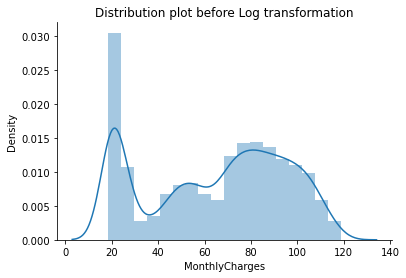

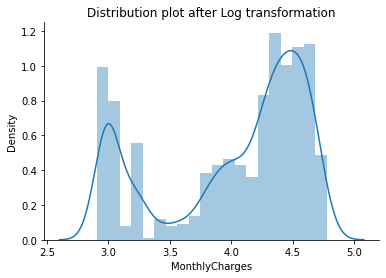

In [64]:
sns.distplot(df['MonthlyCharges'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
df['MonthlyCharges']=np.log(df['MonthlyCharges'])
sns.distplot(df['MonthlyCharges'])
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

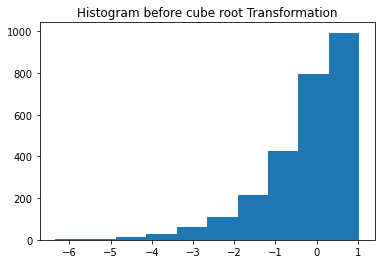

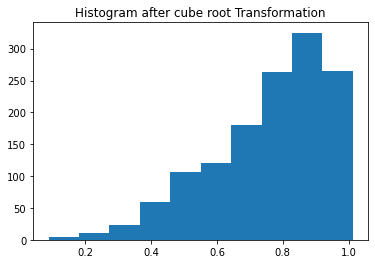

In [65]:
plt.hist(df['TotalCharges'])
plt.title("Histogram before cube root Transformation")
plt.show()
df['TotalCharges'] = (df['TotalCharges']**(1/3))
plt.hist(df['TotalCharges'])
plt.title("Histogram after cube root Transformation")
plt.show()

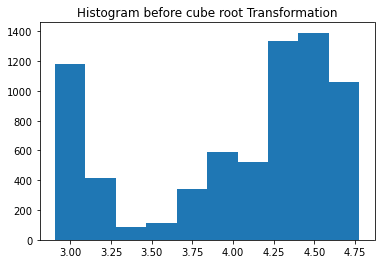

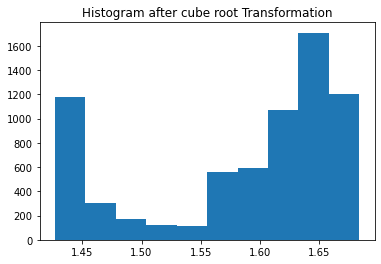

In [66]:
plt.hist(df['MonthlyCharges'])
plt.title("Histogram before cube root Transformation")
plt.show()
df['MonthlyCharges'] = (df['MonthlyCharges']**(1/3))
plt.hist(df['MonthlyCharges'])
plt.title("Histogram after cube root Transformation")
plt.show()

In [67]:
type(df.corr())

pandas.core.frame.DataFrame

PLOTTING CORRELATION

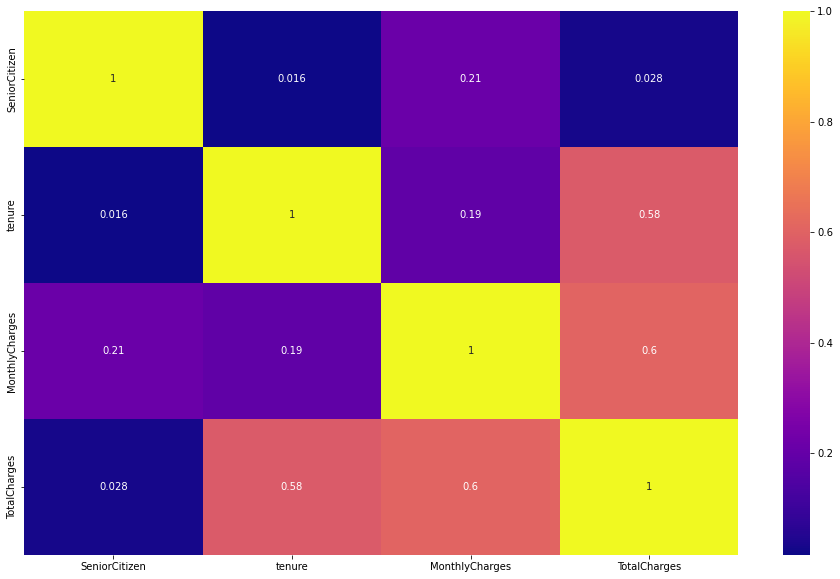

In [68]:
#plotting correlation
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap="plasma",linecolor="black")
plt.show()

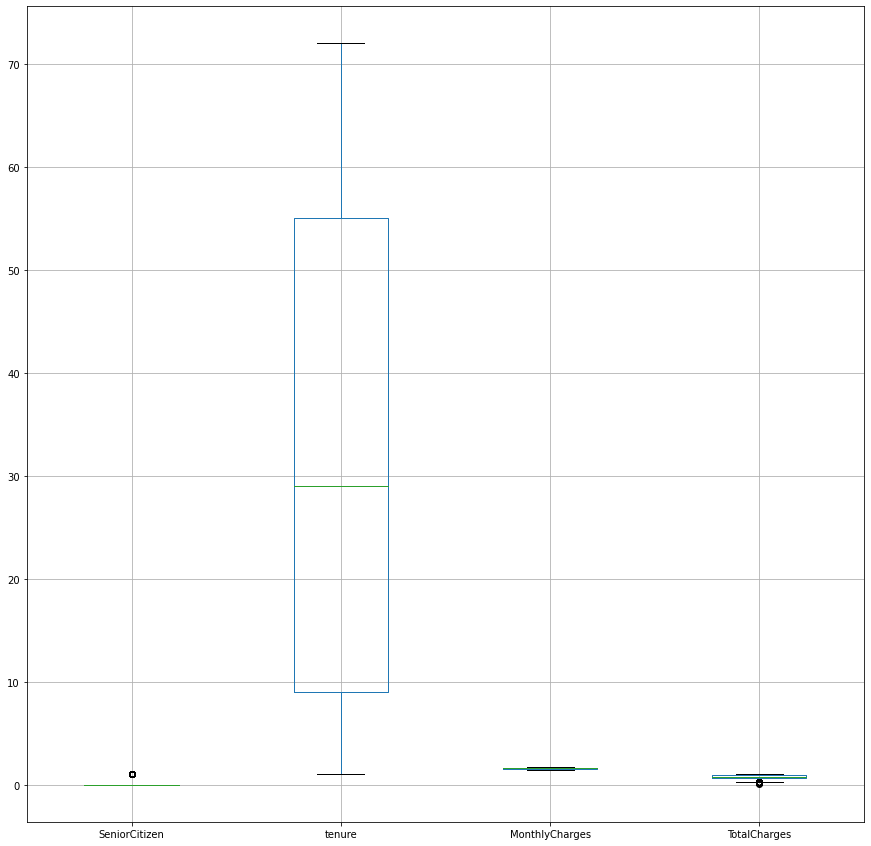

In [69]:
plt.figure(figsize=(15,15))
df.boxplot()
plt.show()

In [70]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [71]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
   
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.503132,NaN,0.0
1,3953.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,1.592960,NaN,0.0
2,2558.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.585574,NaN,1.0
3,5524.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.552896,NaN,0.0
4,6500.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.620878,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.643630,NaN,0.0
7039,1524.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.667511,0.930997,0.0
7040,3358.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.501890,NaN,0.0
7041,5923.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.627324,NaN,1.0


In [72]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,1360.000000,7032.000000
mean,3515.500000,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,...,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,1.586227,0.758185,0.265785
std,2030.107879,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,...,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,0.081934,0.178255,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.426726,0.088831,0.000000
25%,1757.750000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.528634,0.652994,0.000000
50%,3515.500000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.620248,0.795279,0.000000
75%,5273.250000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.650753,0.899607,1.000000
max,7031.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.684169,1.012590,1.000000


<AxesSubplot:>

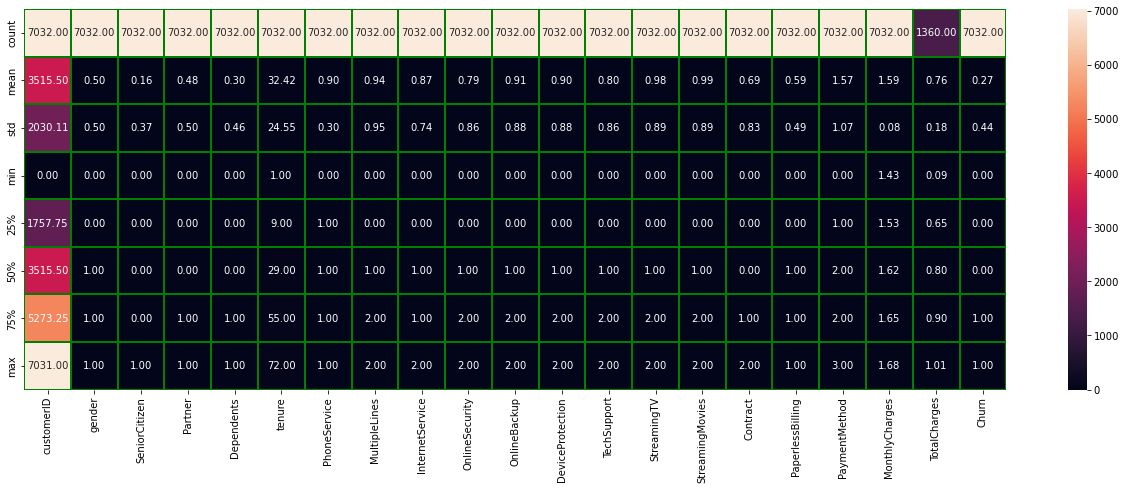

In [73]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="green",fmt="0.2f")

In [74]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006235,-0.002368,-0.026509,-0.011871,0.007209,-0.006987,0.004497,-0.012335,0.013740,...,-0.006726,0.001763,-0.007650,-0.017207,0.015949,-0.002225,0.011754,0.001619,-0.026992,-0.017858
gender,0.006235,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,...,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.012501,-0.023186,-0.008545
SeniorCitizen,-0.002368,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,...,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.214700,0.028496,0.150541
Partner,-0.026509,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,...,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.071531,0.090146,-0.149982
Dependents,-0.011871,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,...,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.123205,-0.000526,-0.163128
tenure,0.007209,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,...,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.187588,0.575116,-0.354049
PhoneService,-0.006987,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,...,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.162369,0.218059,0.011691
MultipleLines,0.004497,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,...,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.404885,0.194055,0.038043
InternetService,-0.012335,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,...,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.505846,0.305779,-0.047097
OnlineSecurity,0.013740,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,...,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.080638,0.072475,-0.289050


<AxesSubplot:>

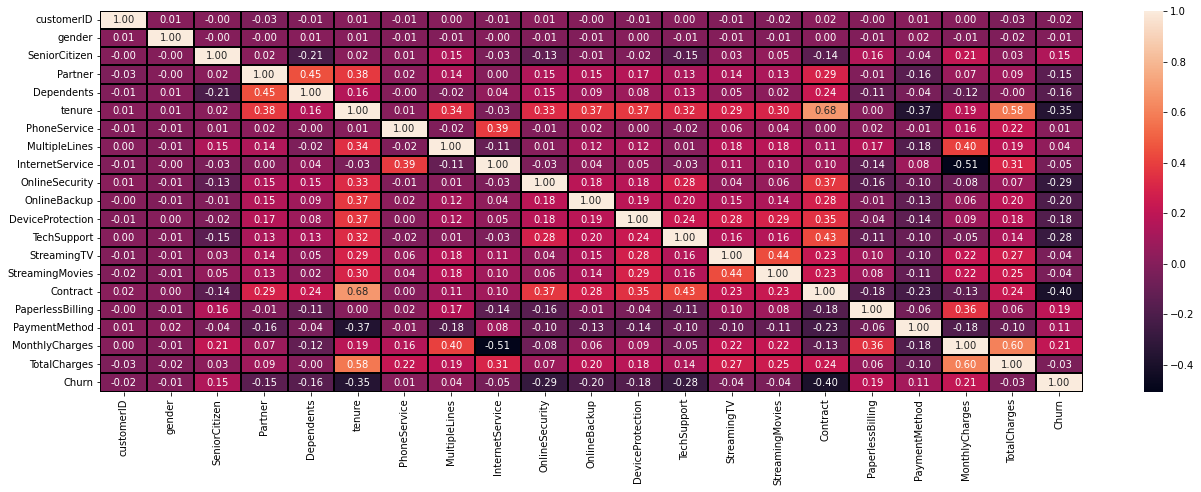

In [75]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [76]:
df.skew()

customerID          0.000000
gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.808957
TotalCharges       -0.879319
Churn               1.060622
dtype: float64

In [77]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

<AxesSubplot:>

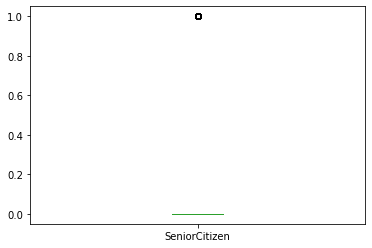

In [78]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

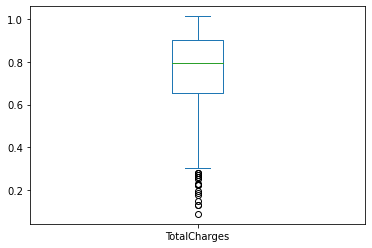

In [79]:
df['TotalCharges'].plot.box()

<AxesSubplot:>

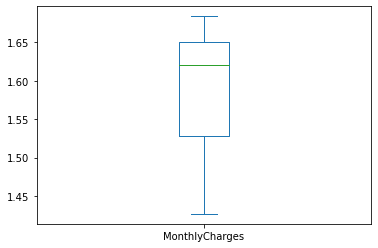

In [80]:
df['MonthlyCharges'].plot.box()

<AxesSubplot:>

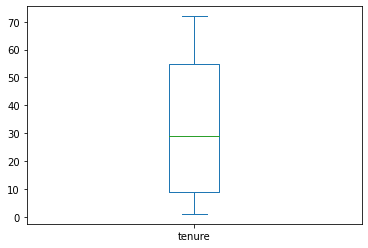

In [81]:
df['tenure'].plot.box()

In [82]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [83]:
df['TotalCharges'].unique()

array([       nan, 0.73976778, 0.57929926, ..., 0.8914465 , 0.93099713,
       0.88760804])

In [84]:
df['MonthlyCharges'].unique()

array([1.50313195, 1.59296044, 1.58557376, ..., 1.60631886, 1.55894581,
       1.63436635])

In [85]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [86]:
#Outlier remove
df.shape

(7032, 21)

In [87]:
X=df_dummies.drop(columns=['Churn'])
y=df_dummies['Churn'].values

In [88]:
from sklearn.preprocessing import MinMaxScaler
features=X.columns.values
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X))
X.columns=features

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [90]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
result=model.fit(X_train,y_train)

In [91]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.8075829383886256


AxesSubplot(0.125,0.125;0.775x0.755)


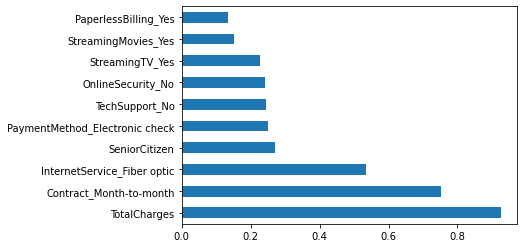

In [92]:
weights=pd.Series(model.coef_[0],index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh'))

total charges has the highest accuracy 

In [93]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)
rf=RandomForestClassifier(n_estimators=1000,oob_score=True, n_jobs=-1, random_state=50, max_features="auto", max_leaf_nodes=30)
rf.fit(X_train, y_train)
prediction_test=rf.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.8088130774697939


<AxesSubplot:>

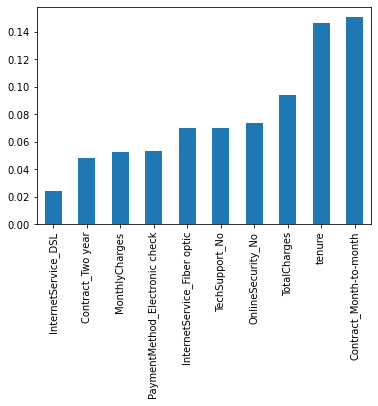

In [94]:
model=rf.feature_importances_
weights=pd.Series(model, index=X.columns.values)
weights.sort_values()[-10:].plot(kind='bar')

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

In [96]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
preds=svm.predict(X_test)
metrics.accuracy_score(y_test,preds)

0.820184790334044

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

[[953  89]
 [164 201]]


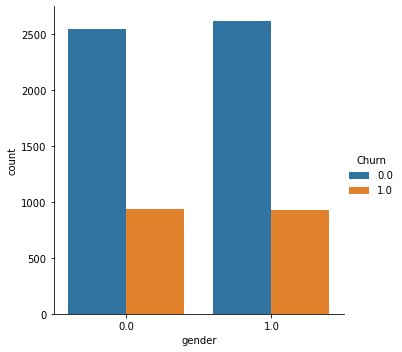

In [98]:
sns.catplot(x='gender', kind='count', hue='Churn', data=df, estimator=lambda x: sum(x==0)*100.0/len(x))

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

parameters  =  {'alpha' :[.0001,  .001,  .01,  .1,  1, 10], 'random_state' :list(range(0,10))}
ls  =  Lasso()
clf  =  GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [100]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion' :['mse' , 'mae'], 'max_features' :["auto" , "sqrt" , "log2"]}
rf  =  RandomForestRegressor()
clf  =  GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [102]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
preds=ada.predict(X_test)
metrics.accuracy_score(y_test,preds)

0.8159203980099502

In [105]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
preds = xgb.predict(X_test)
metrics.accuracy_score(y_test,preds)

0.8095238095238095

In [106]:
import pickle
filename='churn.pkl'
pickle.dump(rf,open(filename,'wb'))

# CONCLUSION

Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

here, customer churn dataset  has the accuracy of 80% of the data from ibm sample datasets with the aim  of building and comparing several models and churn

# THANK YOU